<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1.
Change path_data

In [ ]:
from datascience import *
%matplotlib inline
path_data = 'http://personal.psu.edu/drh20/200DS/assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###Step 2. 
Read table as fiveK

In [ ]:
fiveK = Table.read_table(path_data + 'FiveKResults.csv')

In [ ]:
fiveK.show(5)

Run,Finishing Time In Minutes,Identifies As Female,Age,Name,City,State
AF,17.617,False,27,Andy Cunningham,State College,PA
AF,18.067,False,49,S Mark Courtney,Grove City,PA
AF,18.583,False,46,Terry Reid,Bellefonte,PA
AF,18.717,False,15,Justin Rupert,Wellsboro,PA
AF,18.8,True,35,Kate Fonshell,Ardmore,PA


In [ ]:
fiveK_Male = fiveK.where('Identifies As Female', False)
fiveK_Female = fiveK.where('Identifies As Female', True)

###Step 4.
Amount of cases for both Male and Female table.

In [ ]:
fiveK_Male.num_rows

363

In [ ]:
fiveK_Female.num_rows

293

###Step 5.
Rewrite the function one_bootstrap_median.

In [ ]:
def one_bootstrap_median():
    resampled_Females = fiveK_Female.sample()
    resampled_Males = fiveK_Male.sample()
    Female_mean = np.mean(resampled_Females.column('Finishing Time In Minutes'))
    Male_mean = np.mean(resampled_Males.column('Finishing Time In Minutes'))
    bootstrapped_mean_difference =  Female_mean - Male_mean
    return bootstrapped_mean_difference

In [ ]:
one_bootstrap_median()

4.485097396553186

###Step 6.
Creating a histogram of 5000 bootstrapped mean differences

In [ ]:
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

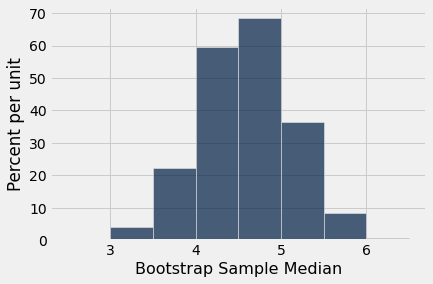

In [ ]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(2.5, 7, 0.5)
resampled_medians.hist(bins = median_bins)

###Step 7.
Find the 2.5 and 97.5 percentiles of your mean difference distribution, and use these values as a 95% confidence interval. 

In [ ]:
left = percentile(2.5, bstrap_medians)
left

3.5391047208040654

In [ ]:
right = percentile(97.5, bstrap_medians)
right

5.6263101853157735

We are 95% confident that the true difference in mean 5K road race finishing times between females and males is between 3.5391047208040654 and 5.6263101853157735.

###Step 8.
It represents the mean of the bootstrap median from the original sample.  